<a href="https://colab.research.google.com/github/madhura2024/deep_learning/blob/main/lung_cancer_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset downloaded at: /root/.cache/kagglehub/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images/versions/1
Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Classes: ['lung_aca', 'lung_n', 'lung_scc']
Epoch 1/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.8393 - loss: 0.4655 - val_accuracy: 0.4310 - val_loss: 1.9448
Epoch 2/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9139 - loss: 0.2284 - val_accuracy: 0.3617 - val_loss: 5.9806


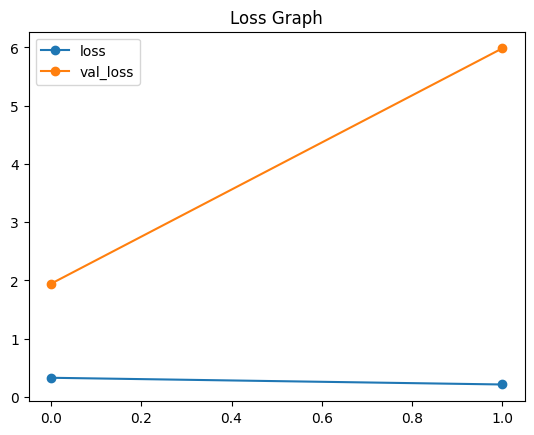

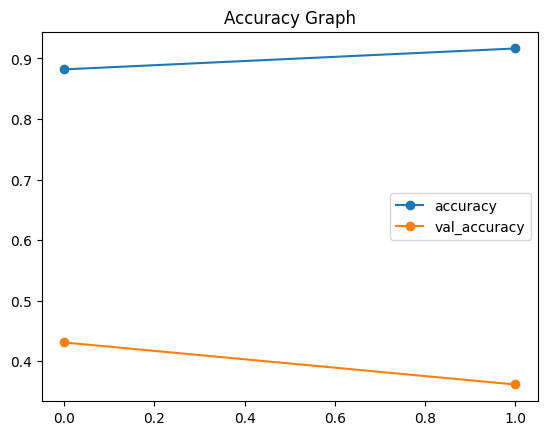

Model saved as lung_colon_cancer_cnn.keras


Saving istockphoto-1424261825-1024x1024.jpg to istockphoto-1424261825-1024x1024.jpg
Predicting istockphoto-1424261825-1024x1024.jpg...


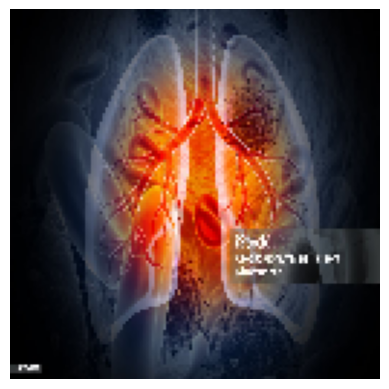

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Prediction: lung_n (83.54% confidence)


In [ ]:
import kagglehub
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from google.colab import files




dataset_name = "andrewmvd/lung-and-colon-cancer-histopathological-images"
print(f"Downloading dataset: {dataset_name} ...")
dataset_path = kagglehub.dataset_download(dataset_name)
print("Dataset downloaded at:", dataset_path)


base_dir = os.path.join(dataset_path,"lung_colon_image_set","lung_image_sets")


height, width = 128, 128
batch_size = 64
epochs = 2


datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
training_data = datagen.flow_from_directory(base_dir,target_size=(height, width),batch_size=batch_size,class_mode='categorical',subset='training',seed=1)
validation_data = datagen.flow_from_directory(base_dir,target_size=(height, width),batch_size=batch_size,class_mode='categorical',subset='validation',seed=1)

class_names = list(training_data.class_indices.keys())
num_classes = training_data.num_classes
print("Classes:", class_names)


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(height, width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history = model.fit(training_data,epochs=epochs,validation_data=validation_data,callbacks=[earlystop])


history_df = pd.DataFrame(history.history)

history_df[['loss', 'val_loss']].plot(marker='o', title="Loss Graph")
history_df[['accuracy', 'val_accuracy']].plot(marker='o', title="Accuracy Graph")
plt.show()



uploaded = files.upload()


def predict_uploaded_image(img_path):
    img = image.load_img(img_path, target_size=(height, width))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    preds = model.predict(img_array)
    class_index = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Prediction: {class_names[class_index]} ({confidence*100:.2f}% confidence)")



for filename in uploaded.keys():
    print(f"Predicting {filename}...")
    predict_uploaded_image(filename)
